# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUBG_train.csv')

In [ ]:
# df = pd.read_csv("/anaconda/JupyterNotebooK/DataSets/PUBG_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
for i in df.columns:
    if df[i].dtype == 'int64':
        df[i] = df[i].astype('int8') 
        
    elif df[i].dtype == 'float64':
        df[i] = df[i].astype('float32') 



# About Data

**DBNOs** - Number of enemy players knocked.

**assists** - Number of enemy players this player damaged that were killed by teammates.

**boosts** - Number of boost items used.

**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.

**headshotKills** - Number of enemy players killed with headshots.

**heals** - Number of healing items used.

**Id** - Player’s Id

**killPlace** - Ranking in match of number of enemy players killed.

**killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

**killStreaks** - Max number of enemy players killed in a short amount of time.

**kills** - Number of enemy players killed.

**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

**matchDuration** - Duration of match in seconds.

**matchId** - ID to identify match. There are no matches that are in both the training and testing set.

**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

**rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

**revives** - Number of times this player revived teammates.

**rideDistance** - Total distance traveled in vehicles measured in meters.

**roadKills** - Number of kills while in a vehicle.

**swimDistance** - Total distance traveled by swimming measured in meters.

**teamKills** - Number of times this player killed a teammate.

**vehicleDestroys** - Number of vehicles destroyed.

**walkDistance** - Total distance traveled on foot measured in meters.

**weaponsAcquired** - Number of weapons picked up.

**winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

**numGroups** - Number of groups we have data for in the match.

**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# OverView 

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,-39,0,0,0.000000,26,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.800003,1,-70,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,0,0,0,0.000000,-15,squad-fpp,26,25,-52,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,0,0,0,0.000000,38,duo,50,47,-45,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,0,0,0,0.000000,-100,squad-fpp,31,30,-128,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.529999,-112,solo-fpp,97,95,24,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


In [ ]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,5,0,0,0.00,81,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.000000,3,-29,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,0,0,0,0.00,-101,solo,93,93,-35,0,0.0,0,0.000,0,0,81.699997,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,0,0,0,0.00,41,squad-fpp,28,28,-36,0,0.0,0,2.184,0,0,788.700012,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,0,2,1,98.50,93,squad-fpp,26,25,-118,2,0.0,0,0.000,0,0,2748.000000,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.000000,0,0,1,18,0,2,1,78.25,-26,solo-fpp,98,94,54,0,1369.0,0,0.000,0,0,1244.000000,5,0,0.5464


In [ ]:
df.shape

(4446966, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int8   
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int8   
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int8   
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int8   
 27  winPoints   

In [ ]:
df.memory_usage()

Index                   128
Id                 35575728
groupId            35575728
matchId            35575728
assists             4446966
boosts              4446966
damageDealt        17787864
DBNOs               4446966
headshotKills       4446966
heals               4446966
killPlace           4446966
killPoints          4446966
kills               4446966
killStreaks         4446966
longestKill        17787864
matchDuration       4446966
matchType          35575728
maxPlace            4446966
numGroups           4446966
rankPoints          4446966
revives             4446966
rideDistance       17787864
roadKills           4446966
swimDistance       17787864
teamKills           4446966
vehicleDestroys     4446966
walkDistance       17787864
weaponsAcquired     4446966
winPoints           4446966
winPlacePerc       17787864
dtype: int64

In [ ]:
df.describe().round(3)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,LABEL_MATCH
count,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.00,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000,4446966.000
mean,0.234,1.107,130.717,0.658,0.227,1.37,47.599,0.282,0.925,0.544,22.998,24.706,44.505,43.008,-17.796,0.165,606.116,0.003,4.509,0.024,0.008,1154.218,3.660,-10.423,0.473,10.830
std,0.589,1.716,170.781,1.146,0.602,2.68,27.463,43.595,1.558,0.711,50.973,76.756,23.828,23.289,43.826,0.472,1498.344,0.073,30.502,0.167,0.093,1183.497,2.452,33.366,0.307,5.326
min,0.000,0.000,0.000,0.000,0.000,0.00,1.000,-128.000,0.000,0.000,0.000,-128.000,1.000,1.000,-128.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-128.000,-128.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.00,24.000,0.000,0.000,0.000,0.000,-33.000,28.000,27.000,-41.000,0.000,0.000,0.000,0.000,0.000,0.000,155.100,2.000,-23.000,0.200,3.000
50%,0.000,0.000,84.240,0.000,0.000,0.00,47.000,0.000,0.000,0.000,0.000,46.000,30.000,30.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,685.600,3.000,0.000,0.458,14.000
75%,0.000,2.000,186.000,1.000,0.000,2.00,71.000,0.000,1.000,1.000,21.320,91.000,49.000,47.000,-1.000,0.000,0.191,0.000,0.000,0.000,0.000,1976.000,5.000,0.000,0.741,15.000
max,22.000,33.000,6616.000,53.000,64.000,80.00,101.000,127.000,72.000,20.000,1094.000,127.000,100.000,100.000,127.000,39.000,40710.000,18.000,3823.000,12.000,5.000,25780.000,102.000,127.000,1.000,15.000


In [ ]:
for i in df.columns:
    print(i,'\n',df[i].value_counts())

Id 
 7f96b2f878858a    1
d19659ceb5b553    1
b587ef96cf8d87    1
66715fcb3b871d    1
59e0d2fdd292a8    1
                 ..
0f3c9b54ce4173    1
9a91d96d201b22    1
a92d0949e8830e    1
f1d8ef55f70584    1
0d8e7ed728b6fd    1
Name: Id, Length: 4446966, dtype: int64
groupId 
 14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026745, dtype: int64
matchId 
 4b5db40aec4797    100
b10e8738adafb9    100
bc28c54250342d    100
c2db47653f79b7    100
79e05d7908e0ca    100
                 ... 
39d2800dad8ae6      6
9f2b49358564ea      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: matchId, Length: 47965, dtype: int64
assists 
 0     3667660
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2e6964ad0>,
      dtype=object)

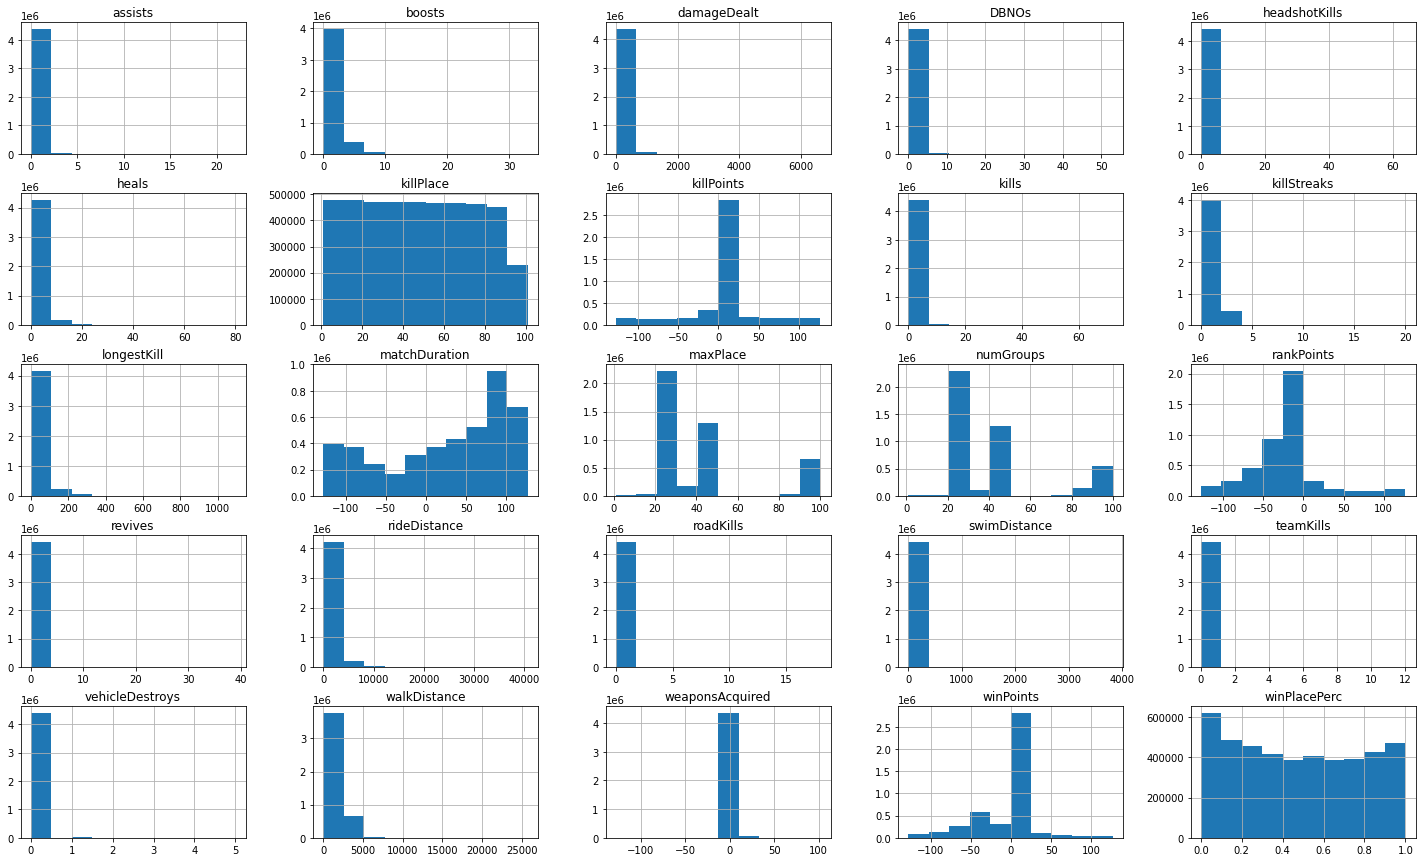

In [ ]:
df.hist(figsize=(25, 15))

# Data Cleaning  

## 1) Duplecates

In [ ]:
df.duplicated().sum()

0

## 2) Missing Values

In [ ]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
df['winPlacePerc'].fillna(np.mean(df['winPlacePerc']), inplace=True)

In [ ]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# ***important*** **Functions**

In [ ]:
# Percentage = (Part/whole)*100

def Percentage(Data_Frame, df_condition):
    Perc = (df_condition.count() / Data_Frame.count()) * 100
    return Perc.round(3)[0]

In [ ]:
def Draw_HeatMap(Data_Frame):
    plt.figure(figsize=(20, 20))
    return sns.heatmap(Data_Frame.corr().round(5), annot=True, linewidths=0.1, robust=True, vmin=0.4, vmax=1, linecolor='yellow')

In [ ]:
#sns.set(font_scale = 2)

def Scatter_Plot(Data_Frame, x_axis, y_axis):
  plt.figure(figsize=(10,6))                        #style = ('darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
  sns.set_theme(style="darkgrid", palette='bright') #palette = ('deep', *'muted','pastel', *'bright','dark', 'colorblind')
  sns.scatterplot(x = x_axis, y = y_axis, data = Data_Frame)

# Visualizing and Exploration **(EDA)**

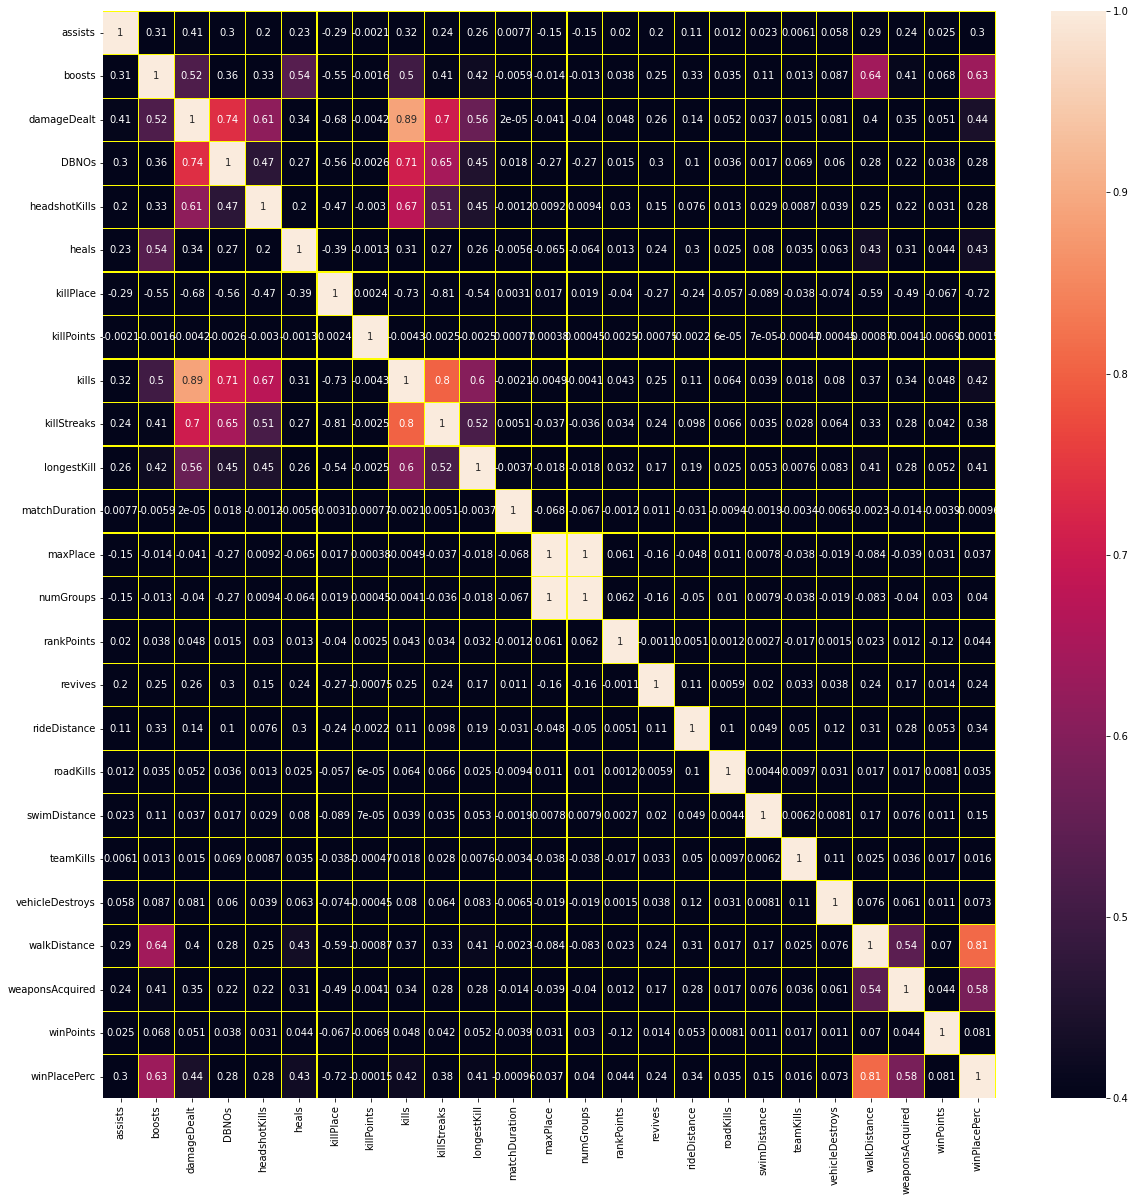

In [ ]:
Draw_HeatMap(df)

## Abnormal **kills** **percentage** of players !


In [ ]:
# logically it's difficult to get more than 20 kills in a single match (df['kills'].value_counts())

playersMore20 = df[df['kills'] == 20 ] 
print('Max kills :', df['kills'].max(),'\n', 'Mean kills :', df['kills'].mean(), '\n', 'Min kills :', df['kills'].min())
print('The Percentage Is =', Percentage(df,playersMore20), '%\n' ,'Their  number is :', playersMore20.count()[0], ' , And 99% of them  kills\' : ', df['kills'].quantile(0.99))

Max kills : 72 
 Mean kills : 0.9247833241810259 
 Min kills : 0
The Percentage Is = 0.002 %
 Their  number is : 109  , And 99% of them  kills' :  7.0


##Abnormal **damageDealt** **percentage** of players !

In [ ]:
# logically damage is related to kills (More kills = More damageDealt)
# playersMore20[['damageDealt', 'kills', 'DBNOs', 'assists']].sort_values(by = 'damageDealt')

Damage_More_5 = df[(df['damageDealt'] > 1331)]
print('Max Damage :',df['damageDealt'].max(),'\n', 'Mean Damage :', df['damageDealt'].mean(), '\n', 'Min Damage :',df['damageDealt'].min())
print('The Percentage Is =',Percentage(df,Damage_More_5),'%\n' ,'Their  number is :',Damage_More_5.count()[0],' , And 99% of them  deals damage :',df['damageDealt'].quantile(0.99))


Max Damage :  6616.0 
 Mean Damage :  130.7172 
 Min Damage :  0.0
The Percentage Is = 0.097 %
 Their  number is : 4330  , And 99% of them  deals damage :  776.2000122070312


### Correlation between **kills**, **damageDealt** and **winPlacePerc** 

In [ ]:
df[['winPlacePerc', 'kills', 'damageDealt']].corr()

,winPlacePerc,kills,damageDealt
winPlacePerc,1.000000,0.419916,0.440507
kills,0.419916,1.000000,0.888783
damageDealt,0.440507,0.888783,1.000000


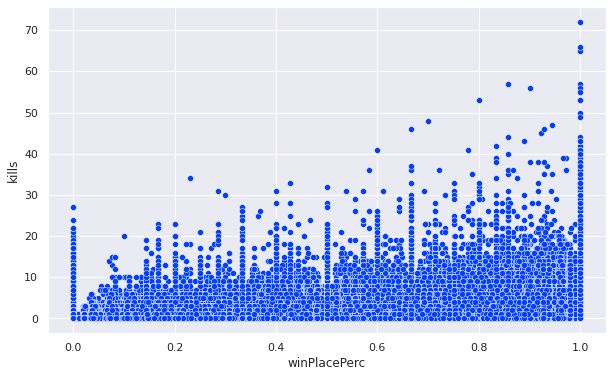

In [ ]:
# killing has a correlation with winning

Scatter_Plot(df, 'winPlacePerc','kills')

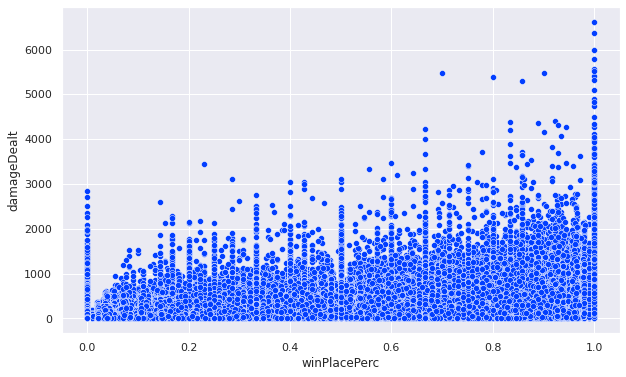

In [ ]:
Scatter_Plot(df, 'winPlacePerc','damageDealt')

## Abnormal **walking** **percentage** of players !

In [ ]:
# By looking to the (max, mean, min) we can discover there is an outlier 

MoreAVG = df[df['walkDistance'] >= 4396]
print('Max walk Distance :',df['walkDistance'].max(),'m\n', 'Mean walk Distance :', df['walkDistance'].mean(),'m', '\n', 'Min walk Distance :',df['walkDistance'].min(),'m' )
print('The Percentage more than Average Is =', Percentage(df, MoreAVG),'%\n' ,'Their number is :',MoreAVG.count()[0], ' , And 99% of them walks :', df['walkDistance'].quantile(0.99),'m')

Max walk Distance :  25780.0 m
 Mean walk Distance :  1154.2177 m 
 Min walk Distance :  0.0 m
The Percentage more than Average Is = 1.001 %
 Their  number is : 44506  , And 99% of them  walks :  4396.0 m


### Correlation between walkDistance and winPlacePerc 

In [ ]:
df[['winPlacePerc', 'walkDistance']].corr()

,winPlacePerc,walkDistance
winPlacePerc,1.000000,0.810887
walkDistance,0.810887,1.000000


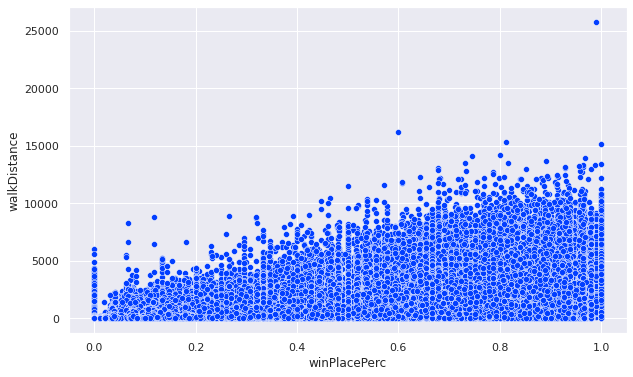

In [ ]:
# walking has a high correlation with winPlacePerc.

Scatter_Plot(df, 'winPlacePerc', 'walkDistance')

## Abnormal **Drive** **percentage** of players !

In [ ]:
# By looking to the (max, mean, min) we can discover there is an outlaier  

drive_more_AVG = df[df['rideDistance'] >= 6966]
print('Max ride Distance :',df['rideDistance'].max(),'m\n', 'Mean ride Distance :', df['rideDistance'].mean(),'m', '\n', 'Min ride Distance :',df['rideDistance'].min(),'m' )
print('The Percentage more than Average Is =', Percentage(df, drive_more_AVG),'%\n' ,'Their  number is :',drive_more_AVG.count()[0], ' , And 99% of them  drives :', df['rideDistance'].quantile(0.99),'m')

Max ride Distance :  40710.0 m
 Mean ride Distance :  606.11597 m 
 Min ride Distance :  0.0 m
The Percentage more than Average Is = 1.0 %
 Their  number is : 44480  , And 99% of them  drives :  6966.0 m


### Correlation between rideDistance and winPlacePerc 

In [ ]:
df[['winPlacePerc', 'rideDistance']].corr()

,winPlacePerc,rideDistance
winPlacePerc,1.000000,0.342915
rideDistance,0.342915,1.000000


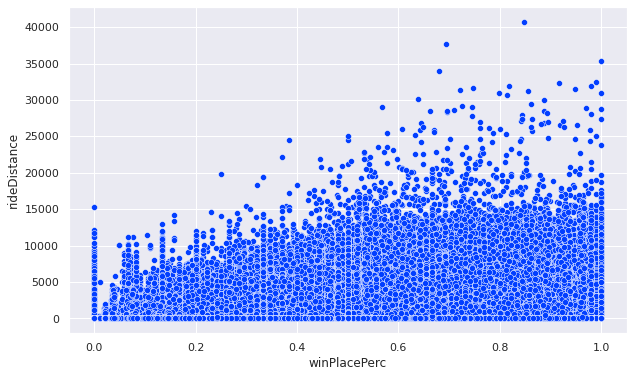

In [ ]:
# There is Good correlation between rideDistance and winPlacePerc
Scatter_Plot(df, 'winPlacePerc', 'rideDistance')

## Destroying a vehicles with WinPercentage ! 

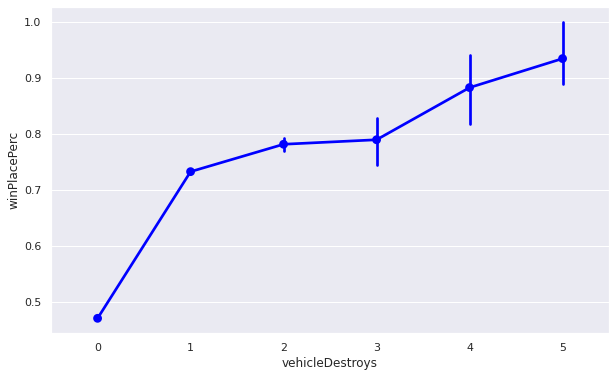

In [ ]:
#Destroying a vehicle in my experience shows that a player has skills

plt.figure(figsize=(10,6))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=df,color='blue')

In [ ]:
df[['vehicleDestroys', 'winPlacePerc']].corr()

,vehicleDestroys,winPlacePerc
vehicleDestroys,1.000000,0.073436
winPlacePerc,0.073436,1.000000


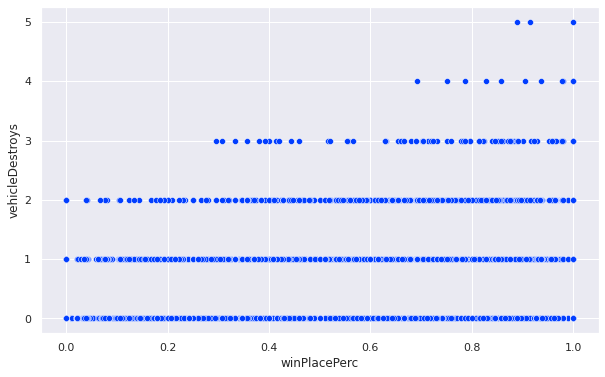

In [ ]:
Scatter_Plot(df, 'winPlacePerc', 'vehicleDestroys')

My experience was correct. Destroying vehicles increases your chance of winning !

## **Percentage** of players who **Swim** more than **Average** ?

In [ ]:
# by searching for abnormal numbers i discovered that players dont swim alot i think becouse the water places are little in 3 maps

swim_more_AVG = df[df['swimDistance'] >= 4.5]
print('Max swim Distance :',df['swimDistance'].max(),'m\n', 'Mean swim Distance :', df['swimDistance'].mean(),'m', '\n', 'Min swim Distance :',df['swimDistance'].min(),'m' )
print('The Percentage more than Average Is =', Percentage(df, swim_more_AVG),'%\n' ,'Their  number is :',swim_more_AVG.count()[0], ' , And 99% of them  swim :', df['swimDistance'].quantile(0.99), 'm')

Max swim Distance :  3823.0 m
 Mean swim Distance :  4.509323 m 
 Min swim Distance :  0.0 m
The Percentage more than Average Is = 5.837 %
 Their  number is : 259559  , And 99% of them  swim :  123.0 m


### Correlation between **swimDistance** and **winPlacePerc**

In [ ]:
df[['winPlacePerc', 'swimDistance']].corr()

,winPlacePerc,swimDistance
winPlacePerc,1.000000,0.149607
swimDistance,0.149607,1.000000


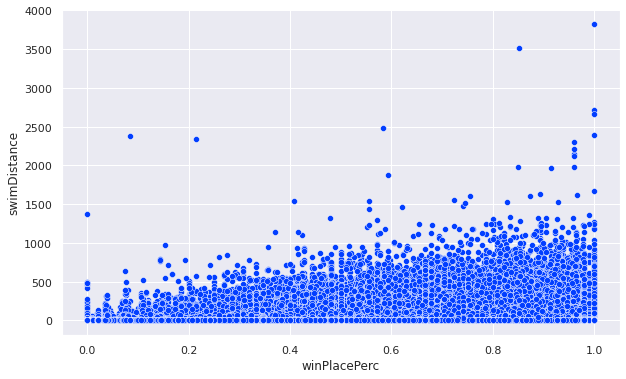

In [ ]:
# There is a small correlation between rideDistance and winPlacePerc

Scatter_Plot(df, 'winPlacePerc', 'swimDistance')

## In my experience heals and boosts help you to win !

In [ ]:
# df['heals'].value_counts().head(50)

In [ ]:
heals_more_AVG = df[df['heals'] >= 25] # normal number of heals pair match
print('Max heal :',df['heals'].max(),'\n', 'Mean heal :', df['heals'].mean(), '\n', 'Min heal :',df['heals'].min())
print('The Percentage more than Average Is =', Percentage(df, heals_more_AVG),'%\n' ,'Their  number is :',heals_more_AVG.count()[0], ' , And 99% of them takes heal :', df['heals'].quantile(0.99))

Max heal :  80 
 Mean heal :  1.370147196987789 
 Min heal :  0
The Percentage more than Average Is = 0.104 %
 Their  number is : 4641  , And 99% of them takes heal :  12.0


In [ ]:
df[['winPlacePerc', 'heals']].corr()

,winPlacePerc,heals
winPlacePerc,1.000000,0.427857
heals,0.427857,1.000000


In [ ]:
boosts_more_AVG = df[df['boosts'] >= 15]
print('Max boost : ',df['boosts'].max(),'\n', 'Mean boost : ', df['boosts'].mean(), '\n', 'Min boost : ',df['boosts'].min())
print('The Percentage more than Average Is =', Percentage(df, boosts_more_AVG),'%\n' ,'Their  number is :',boosts_more_AVG.count()[0], ' , And 99% of them takes heal : ', df['boosts'].quantile(0.99))

Max boost :  33 
 Mean boost :  1.1069077209045448 
 Min boost :  0
The Percentage more than Average Is = 0.156 %
 Their  number is : 6923  , And 99% of them takes heal :  7.0


In [ ]:
df[['winPlacePerc', 'boosts']].corr()

,winPlacePerc,boosts
winPlacePerc,1.000000,0.634234
boosts,0.634234,1.000000


**It's looks like alot of players uses boosts more than heals!**

Text(0.5, 1.0, 'Boosts And Heals')

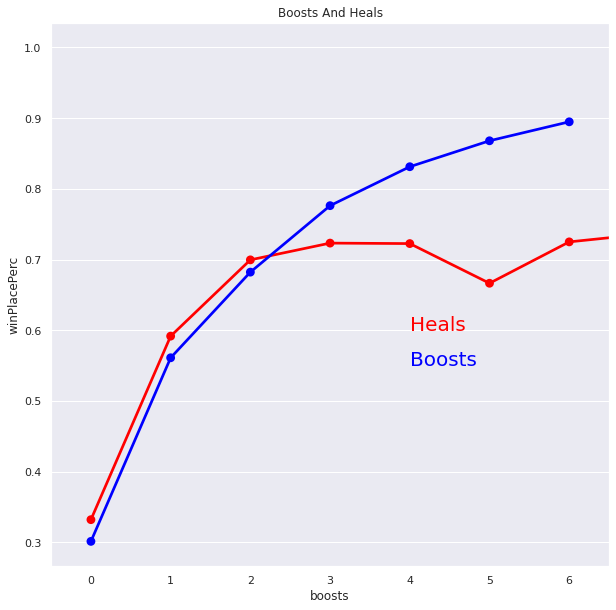

In [ ]:
plt.figure(figsize=(10,10))
data = df[df['heals'] < df['heals'].quantile(0.99)]
data = df[df['boosts'] < df['boosts'].quantile(0.99)]
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 20)
plt.text(4,0.55,'Boosts',color='blue',fontsize = 20)
plt.title('Boosts And Heals')

**healing and boosting are correlated with winPlacePerc. Boosting is more**

## The **max / min** of **headshotKills** that the players does ?

In [ ]:
df['headshotKills'].max()
df[df['headshotKills'] == 64][['Id', 'headshotKills', 'kills', 'assists', 'walkDistance']]


,Id,headshotKills,kills,assists,walkDistance
3431247,06308c988bf0c2,64,72,7,728.099976


In [ ]:
df['headshotKills'].min()
df[df['headshotKills'] == 0][['Id', 'headshotKills']]


,Id,headshotKills
0,7f96b2f878858a,0
1,eef90569b9d03c,0
2,1eaf90ac73de72,0
3,4616d365dd2853,0
4,315c96c26c9aac,0
...,...,...
4446959,d29bfa313ad766,0
4446961,afff7f652dbc10,0
4446962,f4197cf374e6c0,0
4446963,e1948b1295c88a,0


### Correlation between headshotKills and winPlacePerc

In [ ]:
df[['headshotKills', 'winPlacePerc']].corr()

,headshotKills,winPlacePerc
headshotKills,1.000000,0.277722
winPlacePerc,0.277722,1.000000


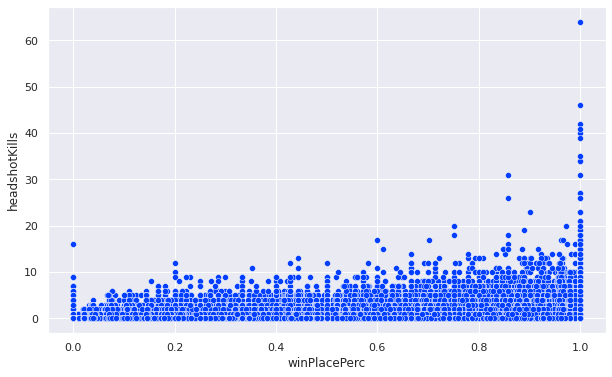

In [ ]:
Scatter_Plot(df,'winPlacePerc', 'headshotKills')

## **Team** who played the most and what is Their  **damageDealt** ? Do they **win or lose** ?


In [ ]:
df['groupId'].value_counts()

14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026745, dtype: int64

In [ ]:
H_G = df[df['groupId'] == '14d6b54cdec6bc']
H_G.groupby(['groupId'])['damageDealt'].sum()

groupId
14d6b54cdec6bc    9393.25
Name: damageDealt, dtype: float32

In [ ]:
H_G = df[df['groupId'] == '14d6b54cdec6bc']
H_G.groupby(['groupId', 'rankPoints'])['rankPoints'].sum()

groupId         rankPoints
14d6b54cdec6bc  -36          -2664.0
Name: rankPoints, dtype: float64

## **Team** who got higher / lower **rankPoints** ? 


In [ ]:
df['rankPoints'].idxmax()
df[df['rankPoints'].index == 1453][['Id','groupId', 'damageDealt', 'rankPoints']]

,Id,groupId,damageDealt,rankPoints
1453,ad1e4e38ce9b25,4175f6d3cd1dc1,157.100006,127


In [ ]:
df['rankPoints'].idxmin()
df[df['rankPoints'].index == 3][['Id','groupId', 'damageDealt', 'rankPoints']]

,Id,groupId,damageDealt,rankPoints
3,4616d365dd2853,a930a9c79cd721,32.900002,-128


## **Percentage** of **cheaters** ?


In [ ]:
# identify cheaters by checking if people are getting kills without moving or dealing damage to any one
cheaters = df[(df['kills'] != 0) & (df['walkDistance'] == 0) &  (df['damageDealt'] != 0)]
print('Percentage Of chaters Is :',Percentage(df,cheaters),'%\n', 'Their  number is :',cheaters.count()[0])

Percentage Of chaters Is : 0.035 %
 Their  number is : 1547


## **Number** of players in each **match type** (Standard Modes) ?
standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”

In [ ]:
df.groupby(['matchType'])['Id'].count()

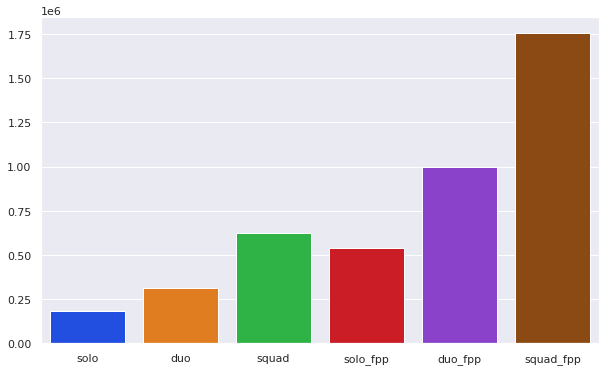

In [ ]:
d = df.groupby(['matchType'])['matchType'] 
Standard_Modes = dict(solo = d.get_group('solo').count(), 
              duo = d.get_group('duo').count(),
            squad = d.get_group('squad').count(),
         solo_fpp = d.get_group('solo-fpp').count(), 
          duo_fpp = d.get_group('duo-fpp').count(),
        squad_fpp = d.get_group('squad-fpp').count())

data = pd.DataFrame(Standard_Modes, index = [0])

plt.figure(figsize= (10, 6))
sns.set_theme(style="darkgrid", palette='bright')
sns.barplot(data = data)


In [ ]:
match_cp = df['matchType'].copy() 

In [ ]:
from sklearn.preprocessing import LabelEncoder # for Ordinal 
lb = LabelEncoder()
df['LABEL_MATCH'] = lb.fit_transform(df['matchType'])
df['LABEL_MATCH']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: LABEL_MATCH, Length: 4446966, dtype: int64

### Correlation between matchType and winPlacePerc

In [ ]:
df[['LABEL_MATCH', 'winPlacePerc']].corr()

,LABEL_MATCH,winPlacePerc
LABEL_MATCH,1.000000,-0.028514
winPlacePerc,-0.028514,1.000000


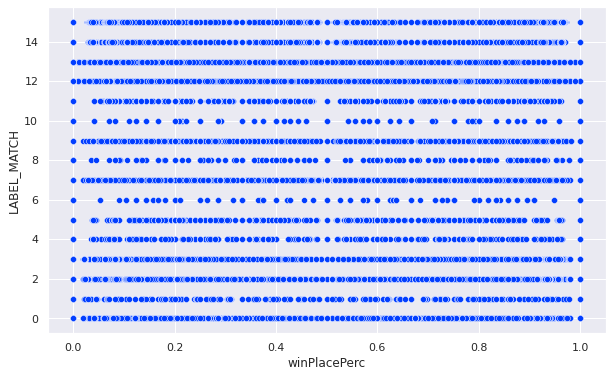

In [ ]:
Scatter_Plot(df, 'winPlacePerc', 'LABEL_MATCH')

**Percentage of players for each Besc Modes**

In [ ]:
solos = df[df['numGroups']>50]
duos = df[(df['numGroups']>25) & (df['numGroups']<=50)]
squads = df[df['numGroups']<=25]

In [ ]:
solos_cheat = solos[(solos['kills'] != 0) & (solos['walkDistance'] == 0) &  (solos['damageDealt'] != 0)]
print('Percentage Of chaters in SOLO Mode Is :',Percentage(df,solos_cheat),'%\n', 'Their  number is :',solos_cheat.count()[0])
px.histogram(solos_cheat.count(), width=800, height=400)

Percentage Of chaters in SOLO Mode Is : 0.004 %
 Their  number is : 172


In [ ]:
duos_cheat = duos[(duos['kills'] != 0) & (duos['walkDistance'] == 0) &  (duos['damageDealt'] != 0)]
print('Percentage Of chaters in DUO Mode Is :',Percentage(df,duos_cheat),'%\n', 'Their  number is :',duos_cheat.count()[0])
px.histogram(duos_cheat['kills'], width=800, height=400)

Percentage Of chaters in DUO Mode Is : 0.002 %
 Their  number is : 77


In [ ]:
squads_cheat = squads[(squads['kills'] != 0) & (squads['walkDistance'] == 0) &  (squads['damageDealt'] != 0)]
print('Percentage Of chaters in SQUAD Mode Is :',Percentage(df,squads_cheat),'%\n', 'Their  number is :',squads_cheat.count()[0])
px.histogram(squads_cheat['kills'], width=800, height=400)

Percentage Of chaters in SQUAD Mode Is : 0.029 %
 Their  number is : 1298


## **Number** of **Aim Hacking** players  ? 


In [ ]:
# Most kills are made from a distance of 100 meters or closer and their is outliers who make a kill from more than 1km

aim = df[(df['longestKill'] > 1000)] # len(aim)
print('The Percentage Is =',Percentage(df,aim),'%\n','Their  number is :',aim.count()[0])
px.histogram(aim['kills'], width=800, height=400)

The Percentage Is = 0.0 %
 Their  number is : 21


## **Number** of **(AFK)** players ? and Their  **percentage** ?


In [ ]:
AFK = df[(df['kills'] == 0) & (df['walkDistance'] == 0) &  (df['damageDealt'] == 0) & (df['rideDistance'] == 0) & (df['swimDistance'] == 0 )]
print('The Percentage of AFK players Is =',Percentage(df,AFK),'%\n','Their  number is :',AFK.count()[0])
px.histogram(AFK['matchDuration'], width=800, height=400)

The Percentage of AFK players Is = 1.983 %
 Their  number is : 88203


## **Percentage** of players who **knocked down** ?

In [ ]:
knocked = df[(df['damageDealt'] > 0) & (df['kills'] != 0) & (df['DBNOs'] > 0) & (df['walkDistance'] > 0)]
print('The Percentage of knocked down players Is =',Percentage(df,knocked),'%\n', 'Their  number is :',knocked.count()[0])
plt.figure(figsize=(10, 6))
px.histogram(knocked['killPlace'], width=800, height=400)

The Percentage of knocked down players Is = 6.376 %
 Their  number is : 283554


<Figure size 720x432 with 0 Axes>

## **Players** have **won** without a **kill** or **deal** **damage** ?

In [ ]:
#!!!!!!!!!!!!!!!!!!!!

win_without_kill = df[(df['winPlacePerc'] == 1) & (df['kills'] == 0) & (df['damageDealt'] == 0) & (df['walkDistance'] == 0) & (df['rideDistance'] == 0) & (df['swimDistance'] == 0 )& 
                      (df['weaponsAcquired'] == 0 )& (df['assists'] == 0 )& (df['boosts'] == 0 )]
                      
print('The Percentage of Players who won without doing any thing Is =',Percentage(df,win_without_kill),'%\n', 'Their  number is :',win_without_kill.count()[0])
px.histogram(win_without_kill['killPlace'], width=800, height=400)

The Percentage of Players who won without doing any thing Is = 0.0 %
 Their  number is : 19


# Plot most 5 correlated columns
corr > 0.40 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eedd1e390>,
      dtype=object)

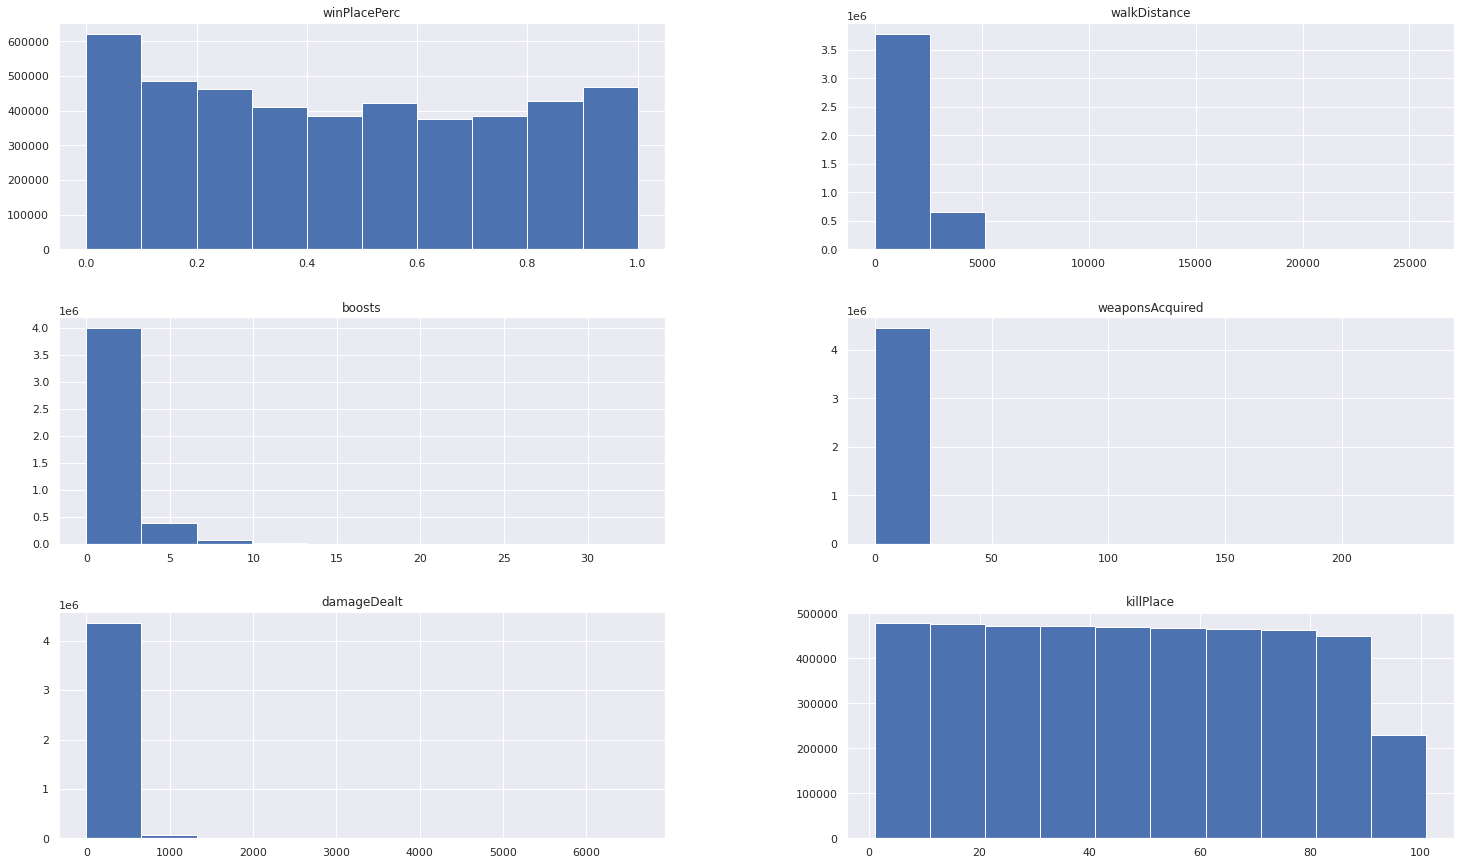

In [ ]:
sns.set()
wanted_columns =df[['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt' ,'killPlace']]
wanted_columns.hist(figsize=(25, 15))

# Feature Engineering

In [7]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.4 MB/s 


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler
import time 
from feature_engine.selection import DropCorrelatedFeatures


In [9]:
def scalers(scale_fun, data):
  MC = scale_fun
  MC_arr = MC.fit_transform(data)
  MC_df = pd.DataFrame(MC_arr, columns=data.columns)
  return MC_df

In [10]:
def Regressors(regressor, data, name = None):
    start_time = time.time()

    sample = data.sample(2000000, random_state=11)

    X = sample.drop('winPlacePerc', axis = 1)
    y = sample['winPlacePerc']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

    REG= regressor
    REG.fit(X_train, y_train)
    y_pred = REG.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    
    if name is not None :
      print(f'The name of the regressor is : {name}')
      
    print('Mean_Absolute_Error = ', MAE)
    print('Mean_Squared_Error = ', MSE)
    print('R2_Score = ', R2_score)

    end_time = time.time()
    print("The Execution Time Is", end_time - start_time)

**Extract a new features**

In [11]:
df['FullDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

In [ ]:
# Good corr !
df[['FullDistance', 'winPlacePerc']].corr()

,FullDistance,winPlacePerc
FullDistance,1.000000,0.677037
winPlacePerc,0.677037,1.000000


1) drop the columns that i see they are not importent and check the model   
2) clean outlaier then train the model    
3) do DropCorrelatedFeatures and check the model

# 1) Drop the columns that i see they are not importent and check the model (Exclude)  
 

In [ ]:
df_1_step = df[['assists', 'boosts', 'damageDealt', 'heals', 'killPlace', 'kills', 'matchDuration', 'FullDistance',  'weaponsAcquired' , 'winPlacePerc']].copy()

In [ ]:
df_1_step.shape

(4446966, 10)

In [ ]:
Draw_HeatMap(df_1_step)

In [ ]:
MC_df_1 = scalers(MinMaxScaler(), df_1_step)

### **DecisionTreeRegressor**


In [ ]:
M = DecisionTreeRegressor(min_samples_leaf=50, max_features=7, random_state=42)
Regressors(M, MC_df_1, name = 'DecisionTreeRegressor_ MinMaxScaler')

The name of the regressor is : DecisionTreeRegressor_ MinMaxScaler
Mean_Absolute_Error =  0.07635049075968804
Mean_Squared_Error =  0.01128147074324692
R2_Score =  0.8803749918621637
The Execution Time Is 16.748294353485107


### **RandomForestRegressor**

In [ ]:
M = RandomForestRegressor()
Regressors(M, MC_df_1, name = 'RandomForestRegressor_ MinMaxScaler')

### **HistGradientBoostingRegressor**

In [ ]:
M = HistGradientBoostingRegressor()
Regressors(M, MC_df_1, name = 'HistGradientBoostingRegressor_ MinMaxScaler')

The name of the regressor is : HistGradientBoostingRegressor_ MinMaxScaler
Mean_Absolute_Error =  0.07459839019706656
Mean_Squared_Error =  0.010648601394978549
R2_Score =  0.8870857304404745
The Execution Time Is 24.830671548843384


# 2) Do DropCorrelatedFeatures and check the model (Exclude)

In [ ]:
dropCorr = DropCorrelatedFeatures(threshold = 0.3, method="spearman")  #pearson: standard correlation coefficient
columnDroped = dropCorr.fit_transform(df)                             #kendall: Kendall Tau correlation coefficient
columnDroped_cp = columnDroped.copy()                                 #spearman: Spearman rank correlation
columnDroped_cp                                                       #callable: callable with input two 1d ndarrays and returning a float.

,Id,groupId,matchId,assists,boosts,killPoints,matchDuration,matchType,maxPlace,rankPoints,revives,roadKills,swimDistance,teamKills,vehicleDestroys,winPoints
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,-39,26,squad-fpp,28,-1,0,0,0.000,0,0,-70
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,-15,squad-fpp,26,-52,0,0,11.040,0,0,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,0,38,duo,50,-45,0,0,0.000,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,-100,squad-fpp,31,-128,0,0,0.000,0,0,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,0,-112,solo-fpp,97,24,0,0,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,5,81,squad-fpp,29,-1,0,0,0.000,0,0,-29
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,0,-101,solo,93,-35,0,0,0.000,0,0,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,0,41,squad-fpp,28,-36,0,0,2.184,0,0,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,0,93,squad-fpp,26,-118,2,0,0.000,0,0,0


In [ ]:
columnDroped_cp.shape

(4446966, 16)

In [ ]:
columnDroped_cp['winPlacePerc'] = df['winPlacePerc']

In [ ]:
columnDroped_cp.drop(['Id', 'groupId', 'matchId', 'matchType' ], axis = 1, inplace = True)

In [ ]:
columnDroped_cp.shape

(4446966, 13)

In [ ]:
MC_columnDroped_cp = scalers(MinMaxScaler(), columnDroped_cp)

### **DecisionTreeRegressor**

In [ ]:
M = DecisionTreeRegressor(min_samples_leaf=50, max_features=7, random_state=42)
Regressors(M, MC_columnDroped_cp, name = 'DecisionTreeRegressor_MinMaxScaler')

The name of the regressor is : DecisionTreeRegressor_MinMaxScaler
Mean_Absolute_Error =  0.17211330231221073
Mean_Squared_Error =  0.046505312370638464
R2_Score =  0.5068729514615486
The Execution Time Is 6.10339093208313


###**KNeighborsRegressor**

In [ ]:
M = KNeighborsRegressor(n_neighbors=7)
Regressors(M, MC_columnDroped_cp, name = 'KNeighborsRegressor_MinMaxScaler')

### **RandomForestRegressor**

In [ ]:
M = RandomForestRegressor(n_estimators=100 , max_leaf_nodes=50,  random_state=42, max_samples=5000)
Regressors(M, MC_columnDroped_cp, name = 'RandomForestRegressor_MinMaxScaler')

The name of the regressor is : RandomForestRegressor_MinMaxScaler
Mean_Absolute_Error =  0.171478845744492
Mean_Squared_Error =  0.04557107075321126
R2_Score =  0.5167793425368731
The Execution Time Is 3.1251540184020996


### **HistGradientBoostingRegressor**

In [ ]:
M = HistGradientBoostingRegressor()
Regressors(M, MC_columnDroped_cp, name = 'HistGradientBoostingRegressor_MinMaxScaler')

The name of the regressor is : HistGradientBoostingRegressor_MinMaxScaler
Mean_Absolute_Error =  0.1696536085860214
Mean_Squared_Error =  0.04499576661945778
R2_Score =  0.5228796784991134
The Execution Time Is 15.188032627105713


# 3)clean outlaier then train the model

# Prepare without drop (Best)

In [12]:
df_3_step = df.copy()

In [13]:
df_3_step.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,FullDistance
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,-0.002142,0.319690,0.243471,0.261425,0.007677,-0.147916,-0.146804,0.020280,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.244362,0.025036,0.299441,0.233644
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,-0.001636,0.502024,0.405327,0.423290,-0.005879,-0.013686,-0.012929,0.037903,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.407364,0.068196,0.634234,0.574247
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,-0.004161,0.888783,0.703599,0.563837,0.000016,-0.040707,-0.040078,0.047592,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353925,0.050865,0.440507,0.313075
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,-0.002641,0.707848,0.646872,0.451422,0.017944,-0.267709,-0.265788,0.015451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218570,0.037774,0.279970,0.224934
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,-0.003023,0.674275,0.512882,0.447261,-0.001223,0.009211,0.009389,0.030005,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.218018,0.030599,0.277722,0.188960
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.001256,0.311781,0.270412,0.263278,-0.005623,-0.064759,-0.064204,0.013327,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309652,0.043797,0.427857,0.438538
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,0.002396,-0.730498,-0.810516,-0.541146,0.003071,0.016792,0.018786,-0.040417,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.491045,-0.066784,-0.719069,-0.483337
killPoints,-0.002142,-0.001636,-0.004161,-0.002641,-0.003023,-0.001256,0.002396,1.000000,-0.004330,-0.002542,-0.002488,0.000766,0.000384,0.000453,0.002480,-0.000753,-0.002214,0.000060,0.000066,-0.000467,-0.000447,-0.000867,-0.004123,-0.006895,-0.000153,-0.001989
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,-0.004330,1.000000,0.802500,0.602936,-0.002056,-0.004847,-0.004060,0.043425,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.337061,0.048105,0.419916,0.282473
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,-0.002542,0.802500,1.000000,0.515097,0.005093,-0.037338,-0.036054,0.034422,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275898,0.041654,0.377566,0.245650


In [14]:
df_3_step.drop(['Id', 'groupId', 'matchId', 'matchType'], axis = 1, inplace = True)

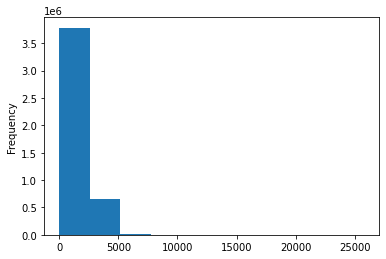

In [15]:
df_3_step['walkDistance'].plot(kind = 'hist')

In [16]:
def Detect_Outliers_without (df, col):
    percentile25 = df[col].quantile(0.25);
    percentile75 = df[col].quantile(0.75);
    IQR = percentile75  - percentile25;

    upper_limit = percentile75 + 1.5 *(IQR);
    lower_limit = percentile25 - 1.5 *(IQR);

    df[col] = np.where(df[col] >upper_limit, upper_limit,df[col])
    df[col] = np.where(df[col] <lower_limit, lower_limit,df[col])


In [17]:
for i in df_3_step.columns:
    Detect_Outliers_without(df_3_step, i)

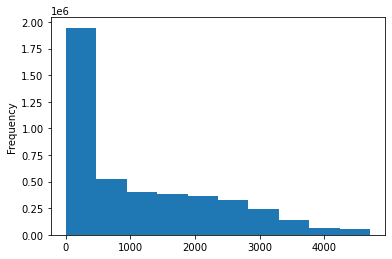

In [18]:
df_3_step['walkDistance'].plot(kind = 'hist')

## Modelling

In [19]:
MC_df_3_step = scalers(MinMaxScaler(), df_3_step)

### **DecisionTreeRegressor**

In [20]:
M = DecisionTreeRegressor()
Regressors(M, MC_df_3_step, name = 'DecisionTreeRegressor_MinMaxScaler')

The name of the regressor is : DecisionTreeRegressor_MinMaxScaler
Mean_Absolute_Error =  0.09036514435860951
Mean_Squared_Error =  0.016428006184811404
R2_Score =  0.8258028215918354
The Execution Time Is 36.346271276474


###**KNeighborsRegressor**

In [ ]:
M = KNeighborsRegressor(n_neighbors=9)
Regressors(M, MC_df_3_step, name = 'KNeighborsRegressor_MinMaxScaler')

The name of the regressor is : KNeighborsRegressor_MinMaxScaler
Mean_Absolute_Error =  0.0
Mean_Squared_Error =  0.0
R2_Score =  1.0
The Execution Time Is 672.0597147941589


In [ ]:
M = KNeighborsRegressor(n_neighbors=9)
Regressors(M, NO_df_3_step, name = 'KNeighborsRegressor_NormalizerScaler')

KeyboardInterrupt: ignored

In [ ]:
M = KNeighborsRegressor(n_neighbors=9)
Regressors(M, PCA_df_3_step, name = 'KNeighborsRegressor_PCA')

###**RandomForestRegressor**

In [ ]:
m = RandomForestRegressor(n_estimators=100 , max_leaf_nodes=50,  random_state=42, max_samples=5000)
Regressors(M, MC_df_3_step, name = 'RandomForestRegressor_MinMaxScaler')

The name of the regressor is : RandomForestRegressor_MinMaxScaler
Mean_Absolute_Error =  0.09058382435870979
Mean_Squared_Error =  0.01650609068150049
R2_Score =  0.8249748392519434
The Execution Time Is 42.33276438713074


### **HistGradientBoostingRegressor**

In [21]:
M = HistGradientBoostingRegressor()
Regressors(M, MC_df_3_step, name = 'HistGradientBoostingRegressor_MinMaxScaler')

The name of the regressor is : HistGradientBoostingRegressor_MinMaxScaler
Mean_Absolute_Error =  0.0650338177954913
Mean_Squared_Error =  0.008196275534152895
R2_Score =  0.9130893879973483
The Execution Time Is 37.23050904273987


# Prepare with drop (Exclude)

In [22]:
df_3_step_drop =df[['damageDealt', 'killPlace', 'killPlace', 'kills', 'matchDuration', 'FullDistance',  'weaponsAcquired' , 'winPlacePerc']].copy()
df_3_step_drop.shape

(4446966, 8)

In [ ]:
df_3_step_drop.drop(['Id', 'groupId', 'matchId', 'matchType' ], axis = 1, inplace = True)

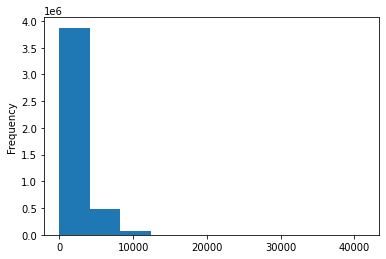

In [24]:
df_3_step_drop['FullDistance'].plot(kind = 'hist')

In [25]:
df_3_step_drop.shape

(4446966, 8)

In [26]:
def Detect_Outliers (df):
    percentile25 = df.quantile(0.25);
    percentile75 = df.quantile(0.75);
    IQR = percentile75  - percentile25;

    upper_limit = percentile75 + 1.5 *(IQR);
    lower_limit = percentile25 - 1.5 *(IQR);

    df_out = df[~((df < (lower_limit)) |(df > (upper_limit))).any(axis=1)]
    return df_out

In [27]:
df_3_step_drop =  Detect_Outliers(df_3_step_drop)

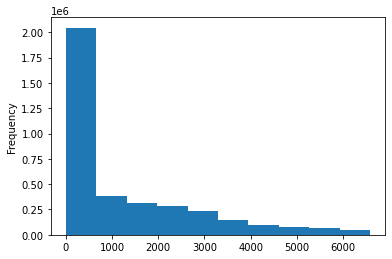

In [28]:
df_3_step_drop['FullDistance'].plot(kind = 'hist')

In [29]:
df_3_step_drop.shape

(3710569, 8)

## Modelling after drop outlaier 

In [30]:
MC_df_3_step_drop = scalers(MinMaxScaler(), df_3_step_drop)

###**DecisionTreeRegressor**

In [31]:
M = DecisionTreeRegressor(min_samples_leaf=50)
Regressors(M, MC_df_3_step_drop, name = 'DecisionTreeRegressor_MinMaxScaler')

The name of the regressor is : DecisionTreeRegressor_MinMaxScaler
Mean_Absolute_Error =  0.07493800009568347
Mean_Squared_Error =  0.011014624694463073
R2_Score =  0.8677693673976397
The Execution Time Is 13.04463243484497


### **KNeighborsRegressor**

In [ ]:
M = KNeighborsRegressor()
Regressors(M, MC_df_3_step_drop, name = 'KNeighborsRegressor_MinMaxScaler')

KeyboardInterrupt: ignored

In [ ]:
M = KNeighborsRegressor()
Regressors(M, NO_df_3_step_drop, name = 'KNeighborsRegressor_NormalizerScaler')

In [ ]:
M = KNeighborsRegressor()
Regressors(M, MA_df_3_step_drop, name = 'KNeighborsRegressor_PCA')

###**RandomForestRegressor**

In [ ]:
M = RandomForestRegressor(n_estimators=100 , max_leaf_nodes=50,  random_state=42, max_samples=5000)
Regressors(M, MC_df_3_step_drop, name = 'RandomForestRegressor_MinMaxScaler')

The name of the regressor is : RandomForestRegressor_MinMaxScaler
Mean_Absolute_Error =  0.07697454601628904
Mean_Squared_Error =  0.011411538779399663
R2_Score =  0.8630044115325219
The Execution Time Is 5.16275429725647



###**HistGradientBoostingRegressor**

In [32]:
M = HistGradientBoostingRegressor()
Regressors(M, MC_df_3_step_drop, name = 'HistGradientBoostingRegressor_MinMaxScaler')

The name of the regressor is : HistGradientBoostingRegressor_MinMaxScaler
Mean_Absolute_Error =  0.07322121108433866
Mean_Squared_Error =  0.010474208211836145
R2_Score =  0.8742570703697095
The Execution Time Is 21.270614862442017


#DF as it is 


In [ ]:
df.head(1)

In [ ]:
df_3 = df.drop(['Id', 'groupId', 'matchId', 'matchType' ], axis = 1).copy()

In [ ]:
MC_df = scalers(MinMaxScaler(), df_3)

###**DecisionTreeRegressor**

In [ ]:
M = DecisionTreeRegressor(min_samples_leaf=50)
Regressors(M, MC_df, name = 'DecisionTreeRegressor_MinMaxScaler')

The name of the regressor is : DecisionTreeRegressor_MinMaxScaler
Mean_Absolute_Error =  0.06529111549211725
Mean_Squared_Error =  0.008606741853296575
R2_Score =  0.9087369379690884
The Execution Time Is 36.8623571395874


###**HistGradientBoostingRegressor**

In [ ]:
M = HistGradientBoostingRegressor()
Regressors(M, MC_df, name = 'HistGradientBoostingRegressor_MinMaxScaler')

The name of the regressor is : HistGradientBoostingRegressor_MinMaxScaler
Mean_Absolute_Error =  0.06367463981215161
Mean_Squared_Error =  0.007956796382409877
R2_Score =  0.9156287461396243
The Execution Time Is 40.511234283447266
